# Calculate performance of the Faster R-CNN model based on IoU

## Set Working Directory

In [3]:
# if get error "ImportError: No module named utils"
# change working directory

# ONLY NEED TO RUN THIS CELL ONCE

import os
os.chdir('./stage2/FasterRCNN')
os.getcwd()

'/Users/mingrenshen/PycharmProjects/MedImgAnalysis/stage2/FasterRCNN'

## Load Library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import imageUtils
from utils import postProcessing
from utils import DetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

/Users/mingrenshen/anaconda3/envs/chainercv/lib/python2.7/site-packages/chainer/_environment_check.py:37: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  ''')  # NOQA


## Load Data

In [3]:
#load Data
root = './DataSetPostiveAug'
#dataset = MultiDetectionDataset(data_dir=root, split='train')
dataset_test = DetectionDataset(data_dir=root, split='test')
bbox_label_names = ('Bleeding')

# DataSet Statistics
#print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 33)
('type of defects: ', 'Bleeding')


In [4]:
print(dataset_test.obtain_image_name(2))

18_13.jpg


## Load Tranied Model

In [5]:
use_gpu = False
proposal_params = {'min_size': 8}
# old weights 'snapshot_model_100000_20181202.npz', 

model = FasterRCNNVGG16(n_fg_class=1, 
                        pretrained_model= 'snapshot_model_200000.npz', 
                        ratios=[ 0.5 , 0.57 , 0.67 , 0.8 , 1 , 1.5 , 2 , 2.5],anchor_scales=[8 , 16, 32, 64], min_size=1000, 
                        max_size=1000,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('Bleeding')

### IoU Caculation

In [6]:
# import the iou function from  utils.evaluation

from utils.evaluation import bbox_iou
testIoUList = list()
resultTxt = open("faster.txt","w")

for i in range(0,len(dataset_test)):
    print("Test image %d"%i)
	# Prediction of second image
    img, gt_bboxes, gt_labels = dataset_test[i]
    model.score_thresh = 0.00001
    pred_bboxes, pred_labels, pred_scores = model.predict([img])
    predbboxes = pred_bboxes[0].tolist()
    gtbboxes = gt_bboxes.tolist()
    print(gtbboxes)
    if len(predbboxes)==0 or len(predbboxes[0]) != 4:
        print("#"*10 + "No Predictions" + "#"*10)
        resultTxt.write("\n")
    else:
        print(predbboxes[0])
        tmp = bbox_iou(predbboxes[0],gtbboxes[0])
        testIoUList.append(tmp)
        fig = plt.figure(figsize=(15,6))
        ax1 = fig.add_subplot(1, 2, 2)
        ax2 = fig.add_subplot(1, 2, 1)
        # plot prediction
        bb = pred_bboxes[0][0]
        resultTxt.write(dataset_test.obtain_image_name(i) + ",")
        resultTxt.write(str(bb[0]) + "," + str(bb[1]) + "," + str(bb[2]) + "," + str(bb[3]) + "," + str(pred_scores[0][0]) + ","+str(tmp)+"\n")
        visualization.vis_bbox(img, pred_bboxes[0], pred_labels[0], pred_scores[0], label_names=bbox_label_names, ax=ax1)
        # plot ground truth
        visualization.vis_bbox(img, gt_bboxes, gt_labels, label_names=bbox_label_names,ax=ax2)
        fig.savefig("IoUtest"+str(i)+".png")
        #plt.cla()
        plt.close('all')
print("Done")
resultTxt.close()

Test image 0


/Users/mingrenshen/anaconda3/envs/chainercv/lib/python2.7/site-packages/chainercv/utils/image/read_image.py:123: UserWarning: Although `chainer.config.cv_read_image_backend == "cv2"`, cv2 is not found. As a fallback option, read_image uses PIL. Either install cv2 or set `chainer.global_config.cv_read_image_backend = "PIL"` to suppress this warning.
  'Although `chainer.config.cv_read_image_backend == "cv2"`, '
/Users/mingrenshen/anaconda3/envs/chainercv/lib/python2.7/site-packages/chainercv/transforms/image/resize.py:69: UserWarning: Although `chainer.config.cv_resize_backend == "cv2"`, cv2 is not found. As a fallback option, resize uses PIL. Either install cv2 or set `chainer.global_config.cv_resize_backend = "PIL"` to suppress this warning.
  'Although `chainer.config.cv_resize_backend == "cv2"`, '


[[492.0, 114.0, 536.0, 160.0]]
[495.64935302734375, 113.03917694091797, 530.5108032226562, 156.4954376220703]
Test image 1
[[497.0, 96.0, 552.0, 158.0]]
[500.12933349609375, 116.84669494628906, 547.4039916992188, 160.2185821533203]
Test image 2
[[493.0, 64.0, 558.0, 162.0]]
[499.0670471191406, 102.83435821533203, 534.5481567382812, 155.79942321777344]
Test image 3
[[497.0, 56.0, 554.0, 162.0]]
[422.86688232421875, 514.7471923828125, 483.9058837890625, 606.9178466796875]
Test image 4
[[492.0, 57.0, 553.0, 157.0]]
[199.1635284423828, 290.2164001464844, 229.26795959472656, 311.7389221191406]
Test image 5
[[500.0, 56.0, 554.0, 153.0]]
[273.998291015625, 222.94361877441406, 313.0167236328125, 250.48780822753906]
Test image 6
[[494.0, 114.0, 532.0, 160.0]]
[490.039306640625, 119.68174743652344, 528.5392456054688, 153.6099090576172]
Test image 7
[[489.0, 118.0, 529.0, 157.0]]
[490.8721923828125, 115.87886810302734, 529.3150634765625, 160.35337829589844]
Test image 8
[[365.0, 302.0, 392.0, 324

In [7]:
#print(testIoUList)
for item in testIoUList:
	print(item)

0.720027062818
0.553505929975
0.295017154535
0.0
0.0
0.0
0.62253832692
0.834099017127
0.653574506404
0.0
0.464999865179
0.468930401255
0.660341369249
0.812769491051
0.674551934261
0.559011227801
0.540405241952
0.0
0.694378329419
0.759208279839
0.675776081604
0.685832854647
0.51189694399
0.40894115362
0.870495185392
0.0
0.0
0.688797514552
0.413606472425
0.764805643584
0.642915353706
0.720774652775
0.705810826753


In [8]:
Tlist = [x for x in testIoUList if x > 0.0 ]

In [9]:
print(Tlist)

[0.7200270628176969, 0.5535059299748275, 0.2950171545347505, 0.6225383269199182, 0.834099017126839, 0.6535745064044033, 0.4649998651791994, 0.46893040125546476, 0.6603413692490404, 0.8127694910510229, 0.6745519342607965, 0.5590112278013447, 0.5404052419518487, 0.6943783294188128, 0.7592082798393095, 0.6757760816041404, 0.6858328546472706, 0.5118969439903058, 0.4089411536197577, 0.8704951853915542, 0.6887975145517793, 0.41360647242455467, 0.7648056435838599, 0.6429153537059025, 0.7207746527745814, 0.7058108267532085]


In [10]:
p = 1.0 * len(Tlist) / len(testIoUList)

In [11]:
print(p)

0.787878787879


In [14]:
# plot historygrarme 
import pandas as pd
df = pd.DataFrame({'IoU' : testIoUList})

<Figure size 1080x432 with 0 Axes>

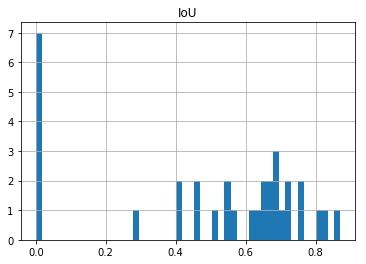

In [15]:
import matplotlib.pyplot as plt
import time

histgramFileName = "Hist_" + time.strftime("%Y%m%d_%H%M%S")
fig = plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1,1)
df.hist(bins=50, ax=ax)
fig.savefig(histgramFileName)